In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Delete the last two columns
df = df.iloc[:, :-2]

In [4]:
# We find that there exist 'Unknown' in some features, we need to transfer the 'Unknown' to 'Nan'
df = df.replace({'Unknown': np.nan})
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Firstly, we directly drop the nan sample. Later, we will try to use KNN or other methods to fill the nan.

In [5]:
df.dropna(inplace=True)
len(df)

7081

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer':1})
df['Gender'] = df['Gender'].replace({'M': 0, 'F':1})
salary_transfer ={'Less than $40K': 20000, '$40K - $60K': 50000, '$60K - $80K': 70000, '$80K - $120K': 100000, '$120K +': 120000}
df['Income_Category'] = df['Income_Category'].replace(salary_transfer)
cat_features = ['Education_Level', 'Card_Category', 'Marital_Status']
for cat in cat_features:
    df[cat] = label_encoder.fit_transform(df[cat])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,3,1,70000,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,2,2,20000,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,2,1,100000,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,0,40,0,3,5,1,70000,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,0,2,2,1,50000,0,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,0,1,3,2,70000,0,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,0,56,1,1,2,2,20000,0,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,0,50,0,2,2,2,50000,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,716506083,1,44,1,1,3,1,20000,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [7]:
X = df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y = df.Attrition_Flag

In [8]:
# In original data, the Attrition sample just accounts for about 16%. The data is imbalanced.
y.sum()/len(y)

0.15718118909758508

In [9]:
# Use SMOTE-ENN Algorithnm to solve the inbalanced dataset problem.
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [10]:
X_resampled

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,3,1,70000,0,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.0610
1,44,0,2,2,1,50000,0,36,3,1,2,4010.000000,1247,2763.000000,1.376000,1088,24,0.846000,0.3110
2,37,0,3,5,2,70000,0,36,5,2,0,22352.000000,2517,19835.000000,3.355000,1350,24,1.182000,0.1130
3,48,0,2,2,2,100000,0,36,6,3,3,11656.000000,1677,9979.000000,1.524000,1441,32,0.882000,0.1440
4,57,1,2,2,1,20000,0,48,5,2,2,2436.000000,680,1756.000000,1.190000,1570,29,0.611000,0.2790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,57,1,0,1,1,20000,0,46,5,2,4,2889.345061,263,2626.194276,0.922854,2690,30,0.484358,0.0896
9581,41,1,1,3,1,20000,0,30,3,2,2,3032.376791,0,3032.376791,0.757857,2734,40,0.375315,0.0000
9582,42,1,3,2,1,20000,0,29,6,2,2,2006.083856,0,2006.083856,0.859343,3074,48,0.569608,0.0000
9583,57,1,2,2,1,20000,0,39,3,2,2,1445.324669,0,1445.324669,0.082366,1633,41,0.142020,0.0000


In [11]:
# After the algorithnm, the dataset is balanced now.
y_resampled.sum()/len(y_resampled)

0.520396452790819

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_origin_train, X_orgin_test, y_origin_train, y_origin_test= train_test_split(X,y, random_state=42,test_size=0.2)
X_resample_train, X_resample_test, y_resample_train, y_resample_test= train_test_split(X_resampled,y_resampled, random_state=42, test_size=0.2)

In [14]:
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier()

clf.fit(X_origin_train, y_origin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
from sklearn import metrics
train_predict = clf.predict(X_origin_train)
test_predict = clf.predict(X_orgin_test)


print('The accuracy of the XGBoost is:',metrics.accuracy_score(y_origin_train,train_predict))
print('The accuracy of the XGBoost is:',metrics.accuracy_score(y_origin_test,test_predict))

The accuracy of the XGBoost is: 1.0
The accuracy of the XGBoost is: 0.9689484827099506


In [16]:
from sklearn import metrics
clf = XGBClassifier()
clf.fit(X_resample_train, y_resample_train)

train_predict = clf.predict(X_resample_train)
test_predict = clf.predict(X_resample_test)

print('The accuracy of the XGBoost is:',metrics.accuracy_score(y_resample_train,train_predict))
print('The accuracy of the XGBoost is:',metrics.accuracy_score(y_resample_test,test_predict))

The accuracy of the XGBoost is: 1.0
The accuracy of the XGBoost is: 0.9921752738654147


In [19]:
feature_name= list(X.columns)
feature_name

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [21]:
features_importance = list(clf.feature_importances_)

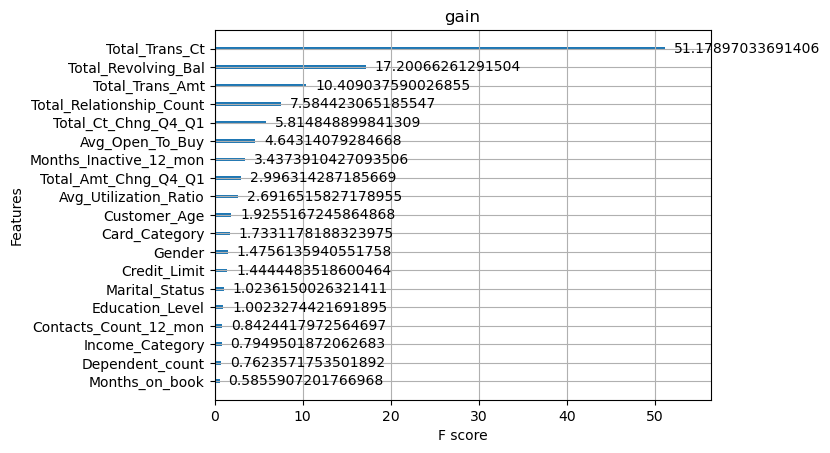

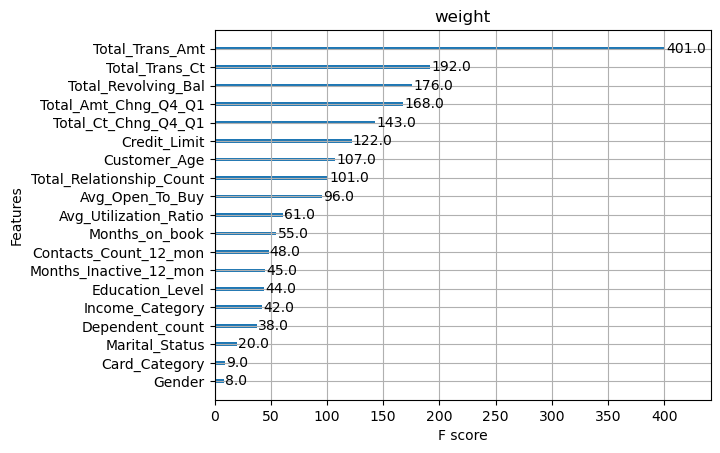

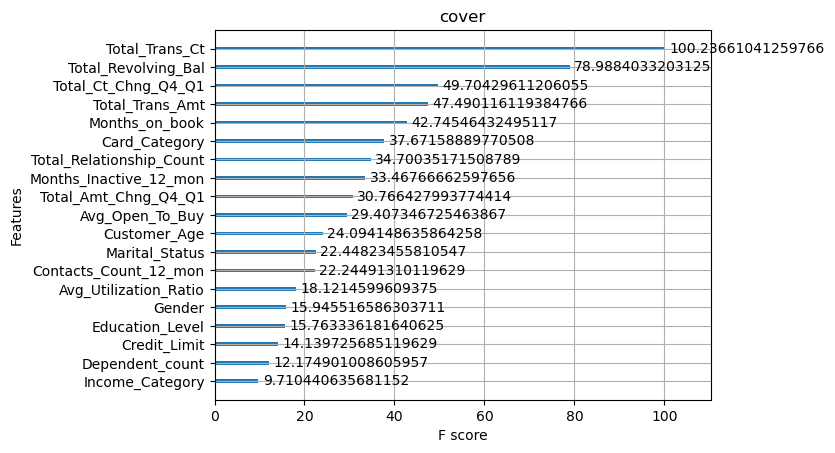

In [23]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

def estimate(model):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()

estimate(clf)
